Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

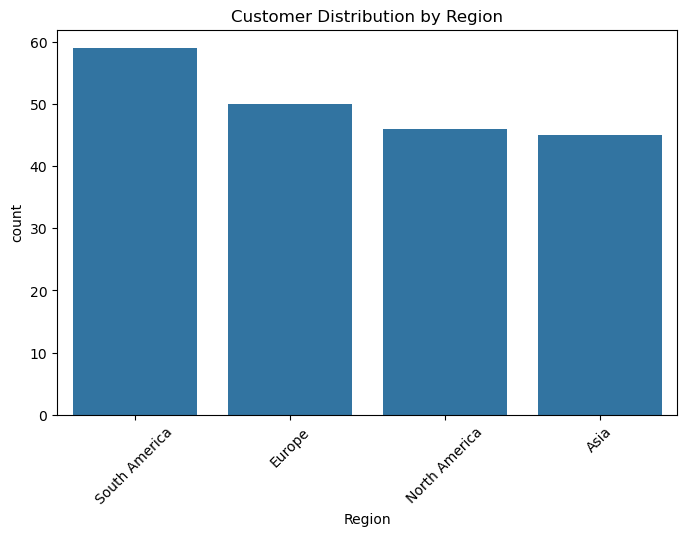

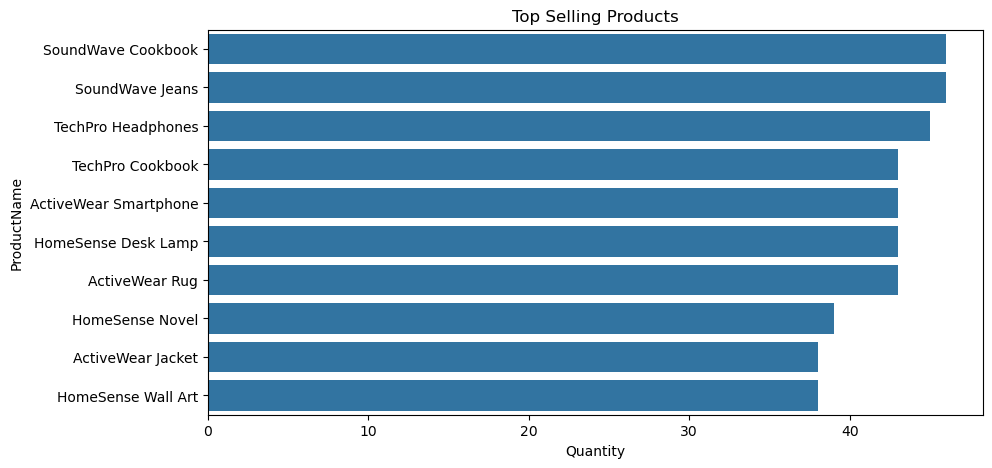

C:\Users\vsuri\AppData\Local\Temp\ipykernel_8288\1031252670.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions.set_index('TransactionDate').resample('M').sum()['TotalValue'].plot()


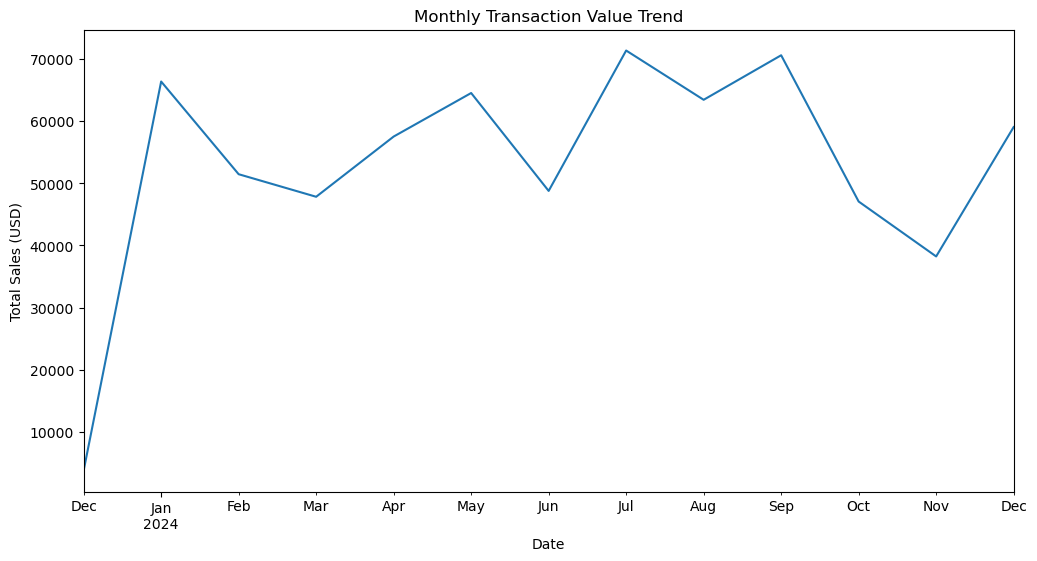

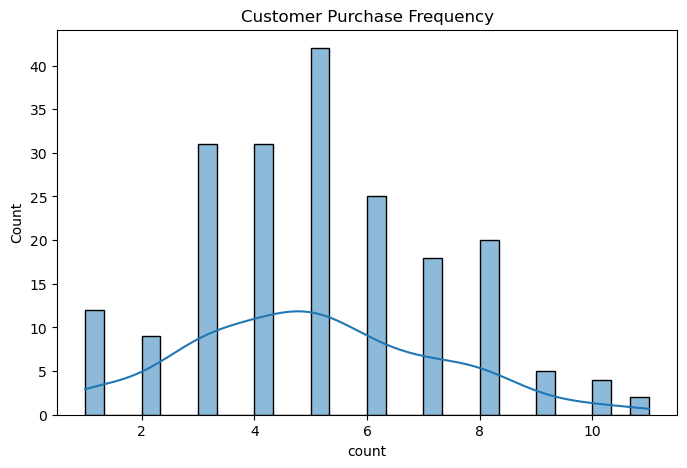

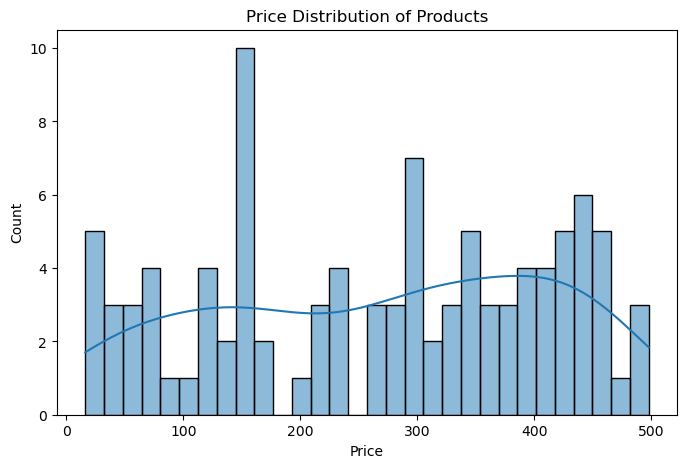

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

#Printing Head of the all CSV
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

# Checking for missing values of all CSV
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Checking for duplicates values of all CSV
print("\nDuplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

# statistics
print("\nSummary Statistics:")
print(transactions.describe())

# Conversion date columns to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# ploting Customer distribution by region
plt.figure(figsize=(8,5))
sns.countplot(x='Region', data=customers, order=customers['Region'].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()

# Ploting Top selling products
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10).reset_index()
top_products = top_products.merge(products, on='ProductID')
plt.figure(figsize=(10,5))
sns.barplot(y='ProductName', x='Quantity', data=top_products)
plt.title("Top Selling Products")
plt.show()

# Ploting Transaction trends over time
plt.figure(figsize=(12,6))
transactions.set_index('TransactionDate').resample('M').sum()['TotalValue'].plot()
plt.title("Monthly Transaction Value Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.show()

# Ploting Customer purchase frequency
customer_frequency = transactions['CustomerID'].value_counts()
plt.figure(figsize=(8,5))
sns.histplot(customer_frequency, bins=30, kde=True)
plt.title("Customer Purchase Frequency")
plt.show()

# Ploting Price distribution
plt.figure(figsize=(8,5))
sns.histplot(products['Price'], bins=30, kde=True)
plt.title("Price Distribution of Products")
plt.show()
